<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/Capstone_Coursera_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model<p>
Regression Tree Model <p>
Neural Network Model<p>

Evaluation and selection of the Model

Lenders would also like to predict the amount of losses. Even if a loan is bad, they can recover some of the money they lent.<p>

For this part of the project, I'll need to consider loans that have `loan_status` **Charged Off**. 

In order to do it, will be necessary to create a new column called `loss`, which is the difference between `loan_amnt` and `total_pymnt`.<p>

Again the dataset will be splitted in training and validation sets using a 60:40 split.<p>

To compare their performance I will use **R-squared and RMS Error**. `loss` will be the dependent variable and all other variables except `loan_amnt`, `total_pymnt`, and `loan_status` will work as explanatory variables.

In [2]:
# importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('df_predictions.csv')
df.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,8000,6.68,245.85,41000.0,24377,51.0,29,2,8351.630000,0,0,0,1,1,0,0
1,12175,9.17,388.13,100000.0,21329,64.6,17,3,13205.910000,0,1,0,0,1,0,0
2,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.380000,1,0,0,1,0,1,0
3,12600,6.68,387.22,73800.0,9904,20.7,25,4,13125.770000,0,0,1,0,1,0,0
4,9000,8.67,284.82,82000.0,46158,77.1,29,2,9789.870001,0,1,0,0,0,0,1


In the first part of this project we attributed binary values to the varible loan_status. The status Charged Off = 1 and Fully Paid = 0. So the first thing we gonna do is drop all entries with fully paid status.

In [4]:
df['loan_status_bin'].value_counts()

0    5401
1    1077
Name: loan_status_bin, dtype: int64

We will work with only 1,077 entries. Ok let's do it.

In [5]:
#dropping entries with Fully Paid status
df.drop(df[df.loan_status_bin == 0].index, inplace=True)

In [6]:
df['loan_status_bin'].value_counts()

1    1077
Name: loan_status_bin, dtype: int64

Now, let's create our new varibale called `loss`

In [7]:
#creating the variable 'loss'
df["loss"] = (df["loan_amnt"] - df["total_pymnt"])
df.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,total_pymnt,loan_status_bin,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
2,6400,6.92,197.38,41900.0,14936,73.2,15,1,3550.38,1,0,0,1,0,1,0,2849.62
6,6000,7.89,187.72,43000.0,3102,50.9,20,3,1701.25,1,0,0,1,0,1,0,4298.75
8,10000,10.99,327.34,36000.0,9022,67.8,49,4,3594.63,1,0,0,1,0,1,0,6405.37
11,16000,18.25,580.45,65000.0,15460,58.8,17,6,8662.40,1,0,0,1,1,0,0,7337.60
16,12000,17.57,431.25,60000.0,16084,76.5,14,4,6850.96,1,0,0,1,0,1,0,5149.04


In [8]:
#dropping 'loan_amnt', 'total_pymnt' and 'loan_status_bin'
df.drop(['loan_amnt', 'total_pymnt', 'loan_status_bin'], axis=1, inplace = True)
df.head()

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
2,6.92,197.38,41900.0,14936,73.2,15,1,0,0,1,0,1,0,2849.62
6,7.89,187.72,43000.0,3102,50.9,20,3,0,0,1,0,1,0,4298.75
8,10.99,327.34,36000.0,9022,67.8,49,4,0,0,1,0,1,0,6405.37
11,18.25,580.45,65000.0,15460,58.8,17,6,0,0,1,1,0,0,7337.60
16,17.57,431.25,60000.0,16084,76.5,14,4,0,0,1,0,1,0,5149.04


In [9]:
#importing regression libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
#creating the training and validation set using 60:40
df_train, df_test = train_test_split(df, test_size=0.6, random_state=42, shuffle=True)

# Set independent and dependent variables
X_train = df_train.loc[:, df_train.columns != 'loss']
y_train = df_train.loc[:, df_train.columns == 'loss']
X_test = df_test.loc[:, df_test.columns != 'loss']
y_test = df_test.loc[:, df_test.columns == 'loss']

In [11]:
#importing the model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(X_train, y_train)

#y_pred = model.predict(X_test)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [1573.35179987]
Coefficients: [[-1.04034265e+02  1.92597772e+01  6.61757659e-03  1.25526612e-03
   9.85176524e-01 -1.02907944e+01 -2.07546059e+01 -7.10192054e+01
   5.94095598e+01  1.16096456e+01  4.84515615e+01 -7.99135906e+01
   3.14620291e+01]]


Let’s breakdown what each of those number means:

The **intercept** value is the estimated average value of our dependent variable when all of our independent variables values is 0. In our case this means that in the case we have all our variables on zero, the **loos will be 1,573.35**.
For the **coefficients** we have 13 values for the all our variables. This value represents the relation of our independent variable to the dependent variable, where a change of exactly 1 at the independent variable will change the value of our dependent variable the same amount as the coefficient.

##**Model Validation**
After building the model it is important for us to validate it’s performance. We can evaluate a model by looking at it’s **coefficient of determination (R²), F-test, t-test, and also residuals**.<p>

**Before we continue** we will rebuild our model using the statsmodel library with the OLS() function. Then we will print the model summary using the summary() function on the model. The model summary contains lots of important value we can use to evaluate our model.

In [12]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

X_train = sm.add_constant(X_train) # adding a constant
olsmod = sm.OLS(y_train, X_train).fit()

y_pred = olsmod.predict(sm.add_constant(X_test))

print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          3.16e-186
Time:                        11:45:48   Log-Likelihood:                -3836.8
No. Observations:                 430   AIC:                             7698.
Df Residuals:                     418   BIC:                             7746.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Coefficient of Determination (R²)**
<p>
Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable. 

In [13]:
print('R2 score:', round(olsmod.rsquared,2))
print('R2 score %:', round((olsmod.rsquared*100),2),'%')

R2 score: 0.88
R2 score %: 88.2 %


R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship.<p>
<p>
In our case, we got R² score about 0.88 which means 88.2% of our dependent variable can be explained using our independent variables.

**F-Test (ANOVA)**<p>
F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). <p>
With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to R² score, we can easily get the F-statistic and probability of said F-statistic by accessing the .fvalues and .f_pvalues attribute of our model as below.

In [14]:
print('F-statistic:', round(olsmod.fvalue,2))
print('Probability of observing value at least as high as F-statistic:', round((olsmod.f_pvalue),2))

F-statistic: 284.13
Probability of observing value at least as high as F-statistic: 0.0


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

**T-test**<p>
The t-statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. <p>
It can be thought of as a measure of the precision with which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as extreme as the one our model have. We can also get the p-value for all of our variables by calling the .pvalues attribute on the model.

In [15]:
print(round(olsmod.pvalues,2))

const                                  0.00
int_rate                               0.00
installment                            0.00
annual_inc                             0.12
revol_bal                              0.75
revol_util                             0.84
total_acc                              0.31
acc_open_past_24mths                   0.60
home_ownership_MORTGAGE                0.22
home_ownership_OWN                     0.12
home_ownership_RENT                    0.04
verification_status_Not Verified       0.02
verification_status_Source Verified    0.17
verification_status_Verified           0.06
dtype: float64


We can see that `annual_inc`, `revol_bal`, `revol_util`, `total_acc`, `acc_open_past_24mths`, `home_owenership_MORTAGE`, `home_owenership_OWN`, `verification_status_Verified` and `verification_status_Source Verified` have *p-values* grater than 0.05. So, 9 of 13 variables have no effect was in the dependent variable `loss` <p>
`int_rate`, `installment`, `home_ownership_RENT` and `verification_status_Not Verified` have *p-values* less than 0.5 which shows that those variables has effects effects in `loss`.

**Assumption Testing**<p>
Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check on our model validity:

* Linearity
* Normality
* Multicollinearity
* Autocorrelation
* Homoscedasticity

**Residual** is the difference between the observed value and predicted value from our dataset. <p>
With statsmodel we can easily get the residual value of our model by simply accesing the .resid attribute of the model and then we can keep it in a new column called 'residual' in our dataframe.

In [16]:
df_train['loss_pred'] = olsmod.predict(X_train)
df_train['residual'] = olsmod.resid
df_train.head()

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss,loss_pred,residual
2744,11.53,494.86,38300.0,12943,60.8,33,4,0,0,1,0,0,1,11002.69,9854.785929,1147.904071
6421,11.53,395.89,55000.0,9849,28.8,27,9,0,0,1,1,0,0,10820.02,7998.711136,2821.308864
1913,18.25,317.44,23076.0,11754,75.8,24,3,0,0,1,0,0,1,5671.98,5764.516904,-92.536904
2109,9.76,289.40,50000.0,18254,52.6,44,7,0,0,1,1,0,0,8141.56,5999.353650,2142.206350
6303,12.69,354.74,50000.0,34991,72.0,16,7,0,0,1,0,1,0,6175.54,7152.865999,-977.325999


**Linearity**<p>
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

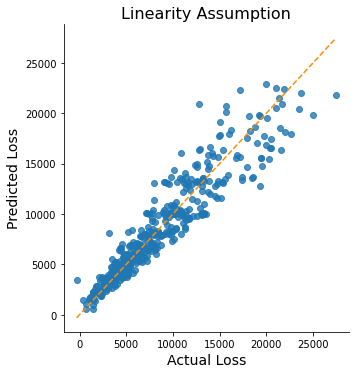

In [17]:
# Plotting the observed vs predicted values
sns.lmplot(x='loss', y='loss_pred', data=df_train, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_train[['loss', 'loss_pred']].min().min()-10, 
                        df_train[['loss', 'loss_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Loss', fontsize=14)
plt.xlabel('Actual Loss', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point evenly spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

**Normality** <p>
This assumes that the error terms of the model are normally distributed. We will examine the *normality* of the residuals by plotting it into histogram and looking at the *p-value* from the Anderson-Darling test for normality. We will use the *normal_ad()* function from *statsmodel* to calculate our *p-value* and then compare it to threshold of 0.05, **if the p-value we get is higher than the threshold then we can assume that our residual is normally distributed**.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


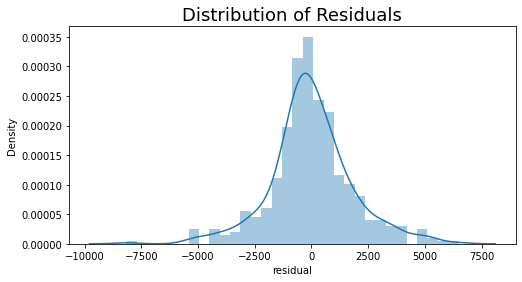

Residuals are not normally distributed


In [18]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_train['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', round(p_value,2))

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_train['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Jarque-Bera test ---- statistic: 65.2100, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9700, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5400, p-value: 0.0000
Anderson-Darling test ---- statistic: 4.9000, 5% critical value: 0.7800
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


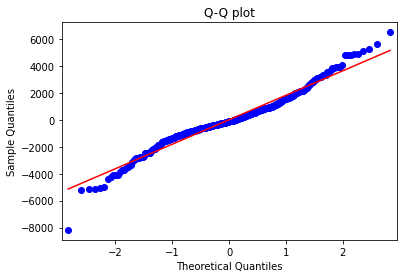

In [19]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(olsmod.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(olsmod.resid)
    sw = stats.shapiro(olsmod.resid)
    ad = stats.anderson(olsmod.resid, dist='norm')
    ks = stats.kstest(olsmod.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {round(jb[0],2):.4f}, p-value: {round(jb[1],2)}')
    print(f'Shapiro-Wilk test ---- statistic: {round(sw[0],2):.4f}, p-value: {round(sw[1],2):.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {round(ks.statistic,2):.4f}, p-value: {round(ks.pvalue,2):.4f}')
    print(f'Anderson-Darling test ---- statistic: {round(ad.statistic,2):.4f}, 5% critical value: {round(ad.critical_values[2],2):.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(regr)

**Conclusion: non-normal distribution**<p>
You have several options for handling your non normal data. Many tests, including the one sample Z test, T test and ANOVA assume normality. <p>
We can can also choose to transform the data with a function, forcing it to fit a normal model. 

However, when we a sample that is skewed or one that naturally fits another distribution type, we may want to run a non parametric test.<p>

A non parametric test is one that doesn’t assume the data fits a specific distribution type. Non parametric tests include the Wilcoxon signed rank test, the Mann-Whitney U Test and the Kruskal-Wallis test.

**Finding our distribution type**<p>
Let’s use the fitter library fitter to identify the distribution of our dataset.<p>
One important thing to note is that the Fitter library has a *get_common_distribution( )* method which includes 10 common distributions. This could come in handy when you don’t have any idea about the distributions that might fit your data.

In [20]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.8 MB/s 
  Created wheel for fitter: filename=fitter-1.4.1-py3-none-any.whl size=25220 sha256=bc49e6d451ec5aad15eef075d07669af6d85d901a636382c808aa6183b2f7ee8
  Stored in directory: /root/.cache/pip/wheels/38/ee/21/98ef5c3186a1f3e8747aa54cf9610fda8876ea82e06c670400
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=e48c9a4e34e4a73b77fb84de913f1beec6ef3cf2af8eff90cb21273294f4fbef
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


The fitted distributions summary will provide top-five distributions that fit the data well. Based on the sumsquared_error criteria the best-fitted distribution is the cauchy distribution.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,1.214178e-07,2118.216824,-9442.632236,inf,0.049791,0.229073
rayleigh,1.649283e-07,inf,-9310.934831,inf,0.121099,0.000006
lognorm,2.152845e-07,2267.610454,-9190.297619,inf,0.081189,0.006504
gamma,2.169736e-07,2260.909741,-9186.936959,inf,0.079133,0.008654
norm,2.176427e-07,2253.366939,-9191.676910,inf,0.077720,0.010485


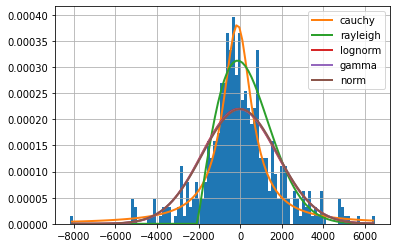

In [21]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df_train['residual'],
           distributions= get_common_distributions())
f.fit()
f.summary()

**Multicollinearity**<p>
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the corr() function from Pandas dataframe. Then we can display it as a heatmap using heatmap() function from Seaborn.

In [22]:
# creating the correlation matrix
corr = df_train[['int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'home_ownership_MORTGAGE',
           'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'loss']].corr()

display(corr);

,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc,acc_open_past_24mths,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loss
int_rate,1.000000,0.029029,-0.248487,-0.017137,0.116201,-0.170924,0.185309,-0.108517,0.096605,0.044230,-0.212176,-0.003963,0.205957,-0.045294
installment,0.029029,1.000000,0.514026,0.344982,0.167801,0.229757,-0.003280,0.244996,0.044434,-0.259153,-0.200986,0.106388,0.080708,0.935602
annual_inc,-0.248487,0.514026,1.000000,0.372969,0.227489,0.398259,0.167344,0.347237,-0.073685,-0.284381,-0.044754,0.049516,-0.008851,0.517764
revol_bal,-0.017137,0.344982,0.372969,1.000000,0.225847,0.219981,-0.046238,0.231595,-0.020774,-0.206887,0.001834,-0.022043,0.021148,0.334908
revol_util,0.116201,0.167801,0.227489,0.225847,1.000000,-0.036973,-0.288961,0.061353,-0.083684,-0.007371,-0.147932,0.110818,0.025637,0.163137
total_acc,-0.170924,0.229757,0.398259,0.219981,-0.036973,1.000000,0.405617,0.344368,-0.029547,-0.308443,-0.020546,-0.056571,0.078297,0.211609
acc_open_past_24mths,0.185309,-0.003280,0.167344,-0.046238,-0.288961,0.405617,1.000000,0.112806,0.032067,-0.126368,-0.069408,-0.039471,0.107019,-0.030601
home_ownership_MORTGAGE,-0.108517,0.244996,0.347237,0.231595,0.061353,0.344368,0.112806,1.000000,-0.231603,-0.807213,0.002838,-0.051042,0.050310,0.231957
home_ownership_OWN,0.096605,0.044434,-0.073685,-0.020774,-0.083684,-0.029547,0.032067,-0.231603,1.000000,-0.387259,-0.032921,-0.109513,0.145051,0.037259
home_ownership_RENT,0.044230,-0.259153,-0.284381,-0.206887,-0.007371,-0.308443,-0.126368,-0.807213,-0.387259,1.000000,0.017286,0.114822,-0.135691,-0.242442


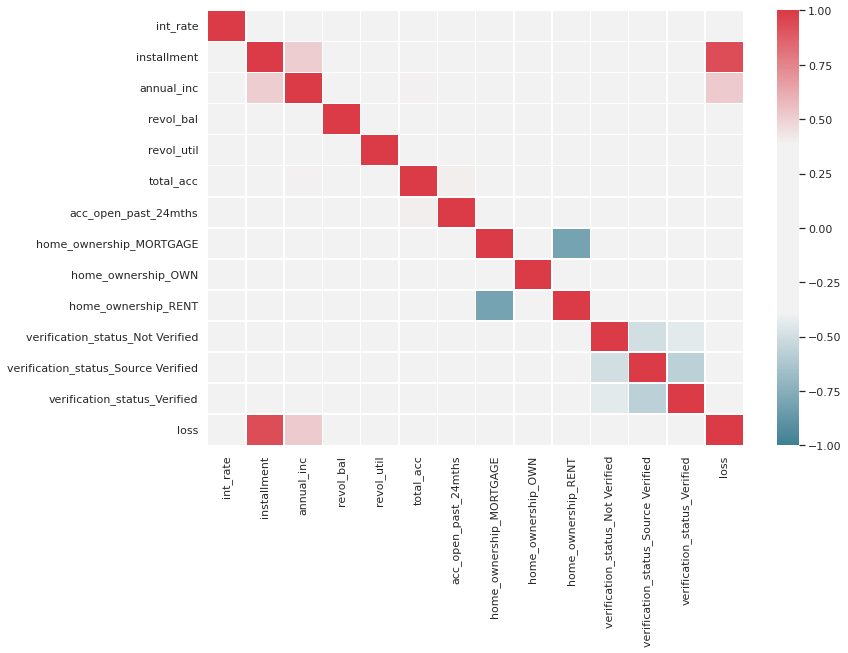

In [23]:
# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(12,8)})
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5);

The image shows that there are some strong relationship between `installment` and `loss` and also a positive relationship between `loss` and `annual_inc`.<p>
We can see that we also have some positive and negative relationships between some of our independent variables, that means that there's some multicollinearity in our data.

**Calculate the VIF value**<p>
Variance Inflation Factor (VIF) is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.<p>

In Python, we can calculate the VIF using a function called *variance_inflation_factor* from the *statsmodels* library.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_info['Column'] = X_train.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
8,inf,home_ownership_MORTGAGE
9,inf,home_ownership_OWN
10,inf,home_ownership_RENT
11,inf,verification_status_Not Verified
12,inf,verification_status_Source Verified
13,inf,verification_status_Verified
3,1.999030,annual_inc
7,1.628583,acc_open_past_24mths
2,1.585835,installment
6,1.568603,total_acc


The VIF value starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.<p>

VIF <= 2.5 is acceptable. In our case we have 7 variables with VIF <= 2.5, which means that is totally acceptable to work with those variables<p>

An infinite value of VIF for a given independent variable indicates that it can be perfectly predicted by other variables in the model. In our case all the dummies got infinite value for VIF, which means that we can exclude them for our model without suffer any problems in our projections.<p>

I'll keep them for now.

**Autocorrelation**<p>
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing *Durbin-Watson* test to determine if either positive or negative correlation is present. In this step we will use the *durbin_watson* () function from *statsmodel* to calculate our **Durbin-Watson score** and then assess the value with the following condition:<p>

* If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied
* If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied
* If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [25]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = round(durbin_watson(df_train['residual']),2)

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.85
Little to no autocorrelation 

Assumption satisfied


Our model got a Durbin-Watson score of about 1.85 which is between 1.5 and 2.5, so we can assume that **there is no autocorrelation in our residual**.

**Homoscedasticity**<p>
When residuals do not have constant variance (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. For example, if the variance of the residuals is increasing over time, confidence intervals for out-of-sample predictions will be unrealistically narrow. Another effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients — the subset in which the error variance was largest.<p>
To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.<p>
We can also use two statistical tests: *Breusch-Pagan* and *Goldfeld-Quandt*. In both of them, the null hypothesis assumes *homoscedasticity* and a *p-value* below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.


 Breusch-Pagan test ----
                                value
Lagrange multiplier statistic  119.44
p-value                          0.00
f-value                         14.62
f p-value                        0.00

 Goldfeld-Quandt test ----
             value
F statistic   1.40
p-value       0.01

 Residuals plots ----


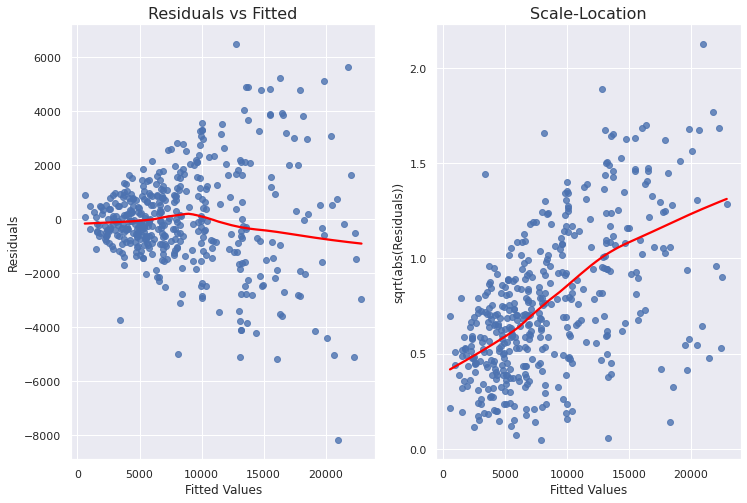

In [26]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = olsmod.predict(X_train)
    resids = olsmod.resid
    resids_standardized = olsmod.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, olsmod.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, olsmod.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(round(bp_test,2))
    print('\n Goldfeld-Quandt test ----')
    print(round(gq_test,2))
    print('\n Residuals plots ----')

homoscedasticity_test(regr)

The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity.<p>

**Potential solutions:**

* log transformation of the dependent variable
* in case of time series, deflating a series if it concerns monetary value
* using ARCH (auto-regressive conditional heteroscedasticity) models to model the error variance. An example might be stock market, where data can exhibit periods of increased or decreased volatility over time (volatility clustering, see this article for more information)

In this specific case we will use log transformation.

In [27]:
# Set independent and dependent variables
X = df.loc[:, df.columns != 'loss']
y = df.loc[:, df.columns == 'loss']

#creating the training and validation set using 60:40
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=42, shuffle=True)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(X_train, y_train)

y_pred = model.predict(X_test)

* ***Mean Squared Error (MSE) -*** There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
* ***Root Mean Squared Error (RMSE) -*** RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.

In [28]:
#evaluating the model
import math
MSE = mean_absolute_error(y_test, y_pred)
print("MSE:\t\t", round(mean_absolute_error(y_test, y_pred),2))
print("RMSE:\t\t", round(math.sqrt(MSE),2))

MSE:		 1362.68
RMSE:		 36.91


#**Multiple Linear Regression Conclusions**<p>
**Comparison numbers**
* Coefficient of Determination (R²) - In our case, we got R² score about 0.88 which means 88.2% of our dependent variable can be explained using our independent variables.
* We also have MSE and RMSE (we will use those numbers with to R² evaluate the model)

**Assumption results**

* Linearity - The inspection of the plots shows that the linearity assumption is satisfied. **(passed)**
* Normality - From the results above we can infer that the residuals do not follow Gaussian distribution, we also know that is a cauchy distribution **(rejected)**
* Multicollinearity - There's multicolinearity on the data, but it is not revelant for now. I don't want to remove variables from the dataframe, so We may use PCA to reduce features to a smaller set of uncorrelated components or not.
* Autocorrelation - there is no autocorrelation in our residual **(passed)**
* Homoscedasticity - there's no homoscedasticity.<p>
Relevant conclusions of our database are that we may need to improve the model to get better results either normalizing the data using **MinMax Scaler()* for example, or applying log to our dependent variable `loss` in order to maximize the results of our model.